In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
col_val = ['O3', 'SO2', 'H2S', 'IAQ', 'CO', 'EtOH', 'RESP', 'NO2']

In [3]:
control_data = np.genfromtxt('data/control3.csv', delimiter=',')
control = pd.DataFrame(control_data, columns=col_val)

In [4]:
lux_soap_data = np.genfromtxt('data/lux.csv', delimiter=',')
lux_soap = pd.DataFrame(lux_soap_data, columns=col_val)

In [5]:
shokubutsu_data = np.genfromtxt('data/shokubutsu.csv', delimiter=',')
shokubutsu = pd.DataFrame(shokubutsu_data, columns = col_val)

In [6]:
control['target'] = 'control'
lux_soap['target'] = 'lux_soap'
shokubutsu['target'] = 'shokubutsu'

In [7]:
df = pd.concat([control, lux_soap, shokubutsu])

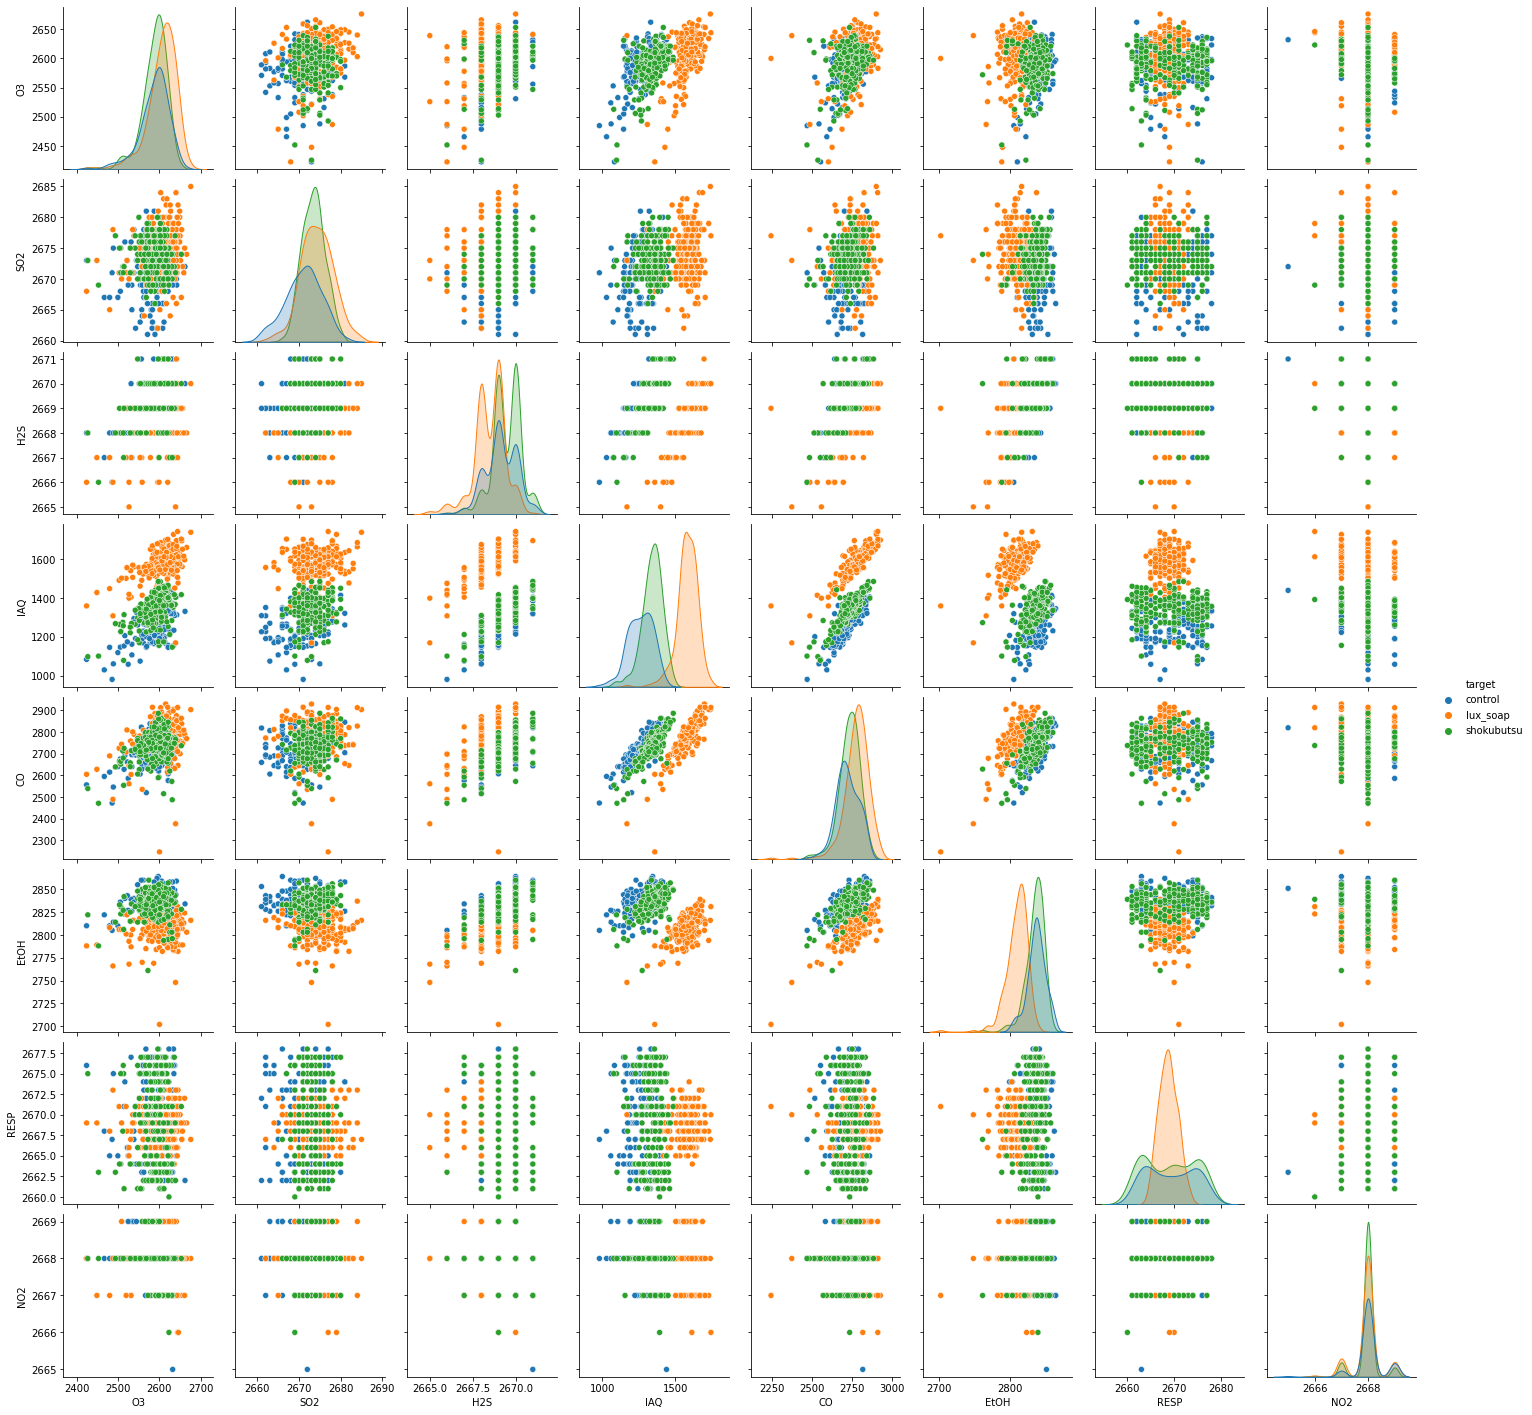

In [8]:
sns.pairplot(df, hue='target')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
log_mod = LogisticRegression(max_iter=3000)

In [12]:
log_mod.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [13]:
y_pred = log_mod.predict(X_test)

In [14]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       0.98      0.78      0.87        58
    lux_soap       1.00      0.97      0.99        74
  shokubutsu       0.81      0.98      0.89        66

    accuracy                           0.92       198
   macro avg       0.93      0.91      0.91       198
weighted avg       0.93      0.92      0.92       198

[[45  0 13]
 [ 0 72  2]
 [ 1  0 65]]


In [17]:
log_mod.predict([[2601,2653,2668,1504,2879,2844,2668,2668]])

array(['shokubutsu'], dtype=object)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
k_range = range(1, 40)
score = [] 
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

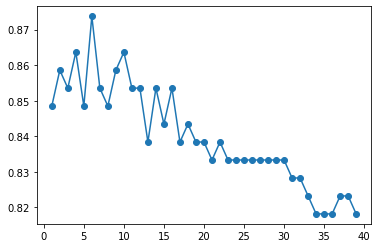

In [21]:
plt.plot(k_range, score, '-o')

In [28]:
score.index(max(score))

5

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [31]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       0.94      0.53      0.68        58
    lux_soap       1.00      0.99      0.99        74
  shokubutsu       0.70      0.97      0.81        66

    accuracy                           0.85       198
   macro avg       0.88      0.83      0.83       198
weighted avg       0.88      0.85      0.84       198

[[31  0 27]
 [ 0 73  1]
 [ 2  0 64]]
